<a href="https://colab.research.google.com/github/trieu123-start/trieu123-start/blob/main/nh%E1%BA%ADn_di%E1%BB%87n_nh%E1%BA%A1c_c%E1%BB%A5_VI%E1%BB%86T_NAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/nhac cu

/content/drive/MyDrive/Colab Notebooks/BTVN/nhac cu


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [21]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/nhac cu/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 588 images belonging to 8 classes.


In [22]:
training_set.class_indices

{'Congchieng': 0,
 'Dandoan': 1,
 'Dannhi_danco': 2,
 'Dantiba': 3,
 'Dantranhvietnam': 4,
 'Khen': 5,
 'Saotruc': 6,
 'danda': 7}

In [23]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/nhac cu/Val',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 103 images belonging to 8 classes.


In [24]:
validation.class_indices

{'Congchieng': 0,
 'Dandoan': 1,
 'Dannhi_danco': 2,
 'Dantiba': 3,
 'Dantranhvietnam': 4,
 'Khen': 5,
 'Saotruc': 6,
 'danda': 7}

In [26]:
# Tạo ra mạng CNN để train mô hình
model= Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 8 tín hiệu ra
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs= 100 ,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
19/19 [==============================] - 14s 732ms/step - loss: 1.8661 - accuracy: 0.3112 - val_loss: 1.7605 - val_accuracy: 0.3010
Epoch 2/100
19/19 [==============================] - 13s 716ms/step - loss: 1.6573 - accuracy: 0.3810 - val_loss: 1.5563 - val_accuracy: 0.4078
Epoch 3/100
19/19 [==============================] - 13s 689ms/step - loss: 1.6342 - accuracy: 0.3929 - val_loss: 1.5131 - val_accuracy: 0.4078
Epoch 4/100
19/19 [==============================] - 13s 674ms/step - loss: 1.5227 - accuracy: 0.4711 - val_loss: 1.4899 - val_accuracy: 0.4369
Epoch 5/100
19/19 [==============================] - 13s 701ms/step - loss: 1.4589 - accuracy: 0.4915 - val_loss: 1.2037 - val_accuracy: 0.5437
Epoch 6/100
19/19 [==============================] - 14s 753ms/step - loss: 1.3217 - accuracy: 0.5204 - val_loss: 1.1795 - val_accuracy: 0.5825
Epoch 7/100
19/19 [==============================] - 13s 691ms/step - loss: 1.1572 - accuracy: 0.5884 - val_loss: 0.9393 - val_accuracy:

In [30]:
Score=model.evaluate(training_set,verbose=0)
print('Kiểm tra sai  ', Score[0])
print('Kiểm tra chính xác  ', Score[1])

Kiểm tra sai   0.01344079989939928
Kiểm tra chính xác   0.9965986609458923


In [31]:
model.save("nhandiennhaccu.h5")

In [32]:
model_CNN=load_model('nhandiennhaccu.h5') # CNN với sử dụng kho ảnh test

1/1 [==============================] - 0s 78ms/step
Cồng Chiêng 


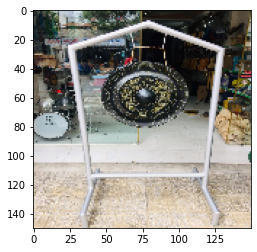

1/1 [==============================] - 0s 16ms/step
Cồng Chiêng 


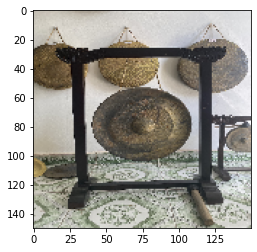

1/1 [==============================] - 0s 15ms/step
Cồng Chiêng 


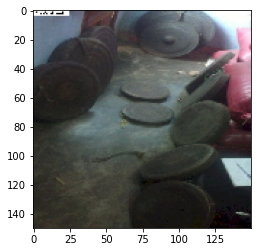

1/1 [==============================] - 0s 16ms/step
Đàn đá


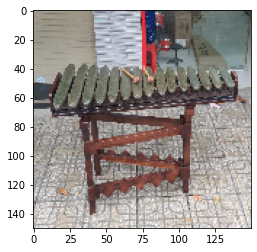

1/1 [==============================] - 0s 15ms/step
Đàn đá


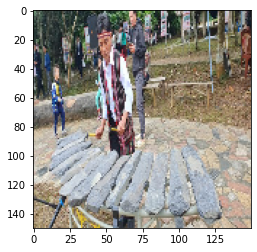

1/1 [==============================] - 0s 17ms/step
Đàn đá


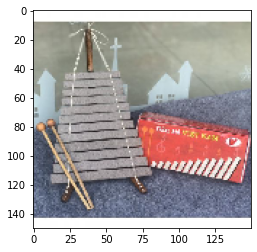

1/1 [==============================] - 0s 15ms/step
Đàn Nhị ( Đàn cò )


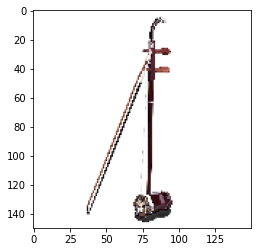

1/1 [==============================] - 0s 17ms/step
 Đàn Đoản 


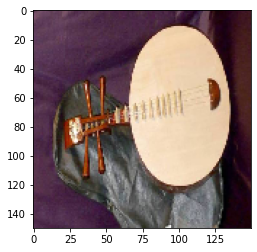

1/1 [==============================] - 0s 15ms/step
 Đàn Đoản 


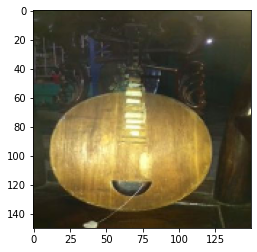

1/1 [==============================] - 0s 15ms/step
 Đàn Đoản 


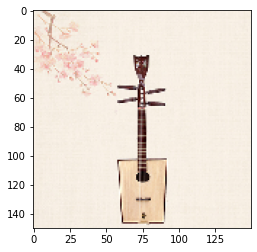

1/1 [==============================] - 0s 17ms/step
Đàn Tranh 


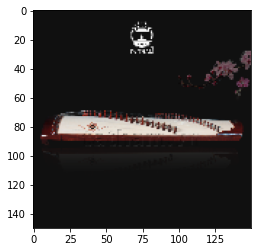

1/1 [==============================] - 0s 25ms/step
Đàn Tranh 


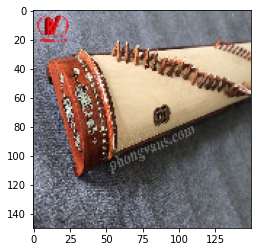

1/1 [==============================] - 0s 20ms/step
Đàn Tranh 


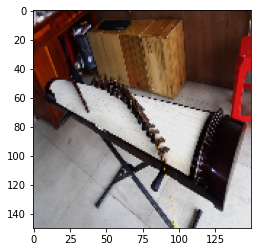

1/1 [==============================] - 0s 15ms/step
Đàn tì bà 


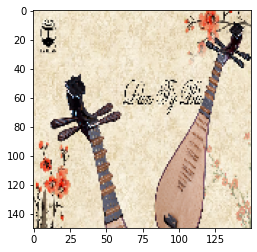

1/1 [==============================] - 0s 15ms/step
Đàn tì bà 


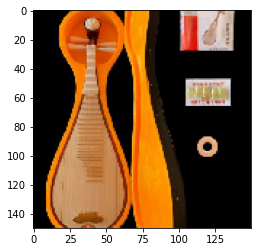

1/1 [==============================] - 0s 15ms/step
Đàn tì bà 


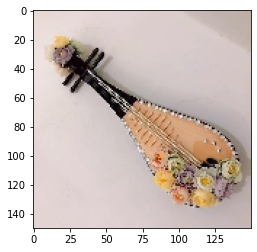

1/1 [==============================] - 0s 15ms/step
Đàn Nhị ( Đàn cò )


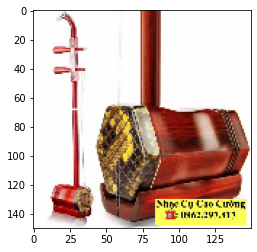

1/1 [==============================] - 0s 24ms/step
Đàn tì bà 


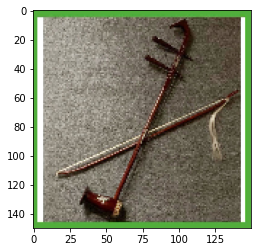

1/1 [==============================] - 0s 15ms/step
Sáo Trúc


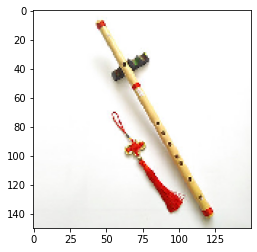

1/1 [==============================] - 0s 18ms/step
Sáo Trúc


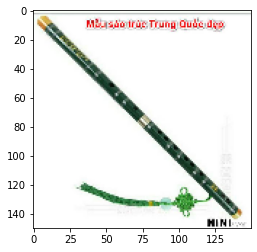

1/1 [==============================] - 0s 17ms/step
Khèn 


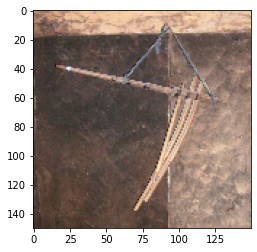

1/1 [==============================] - 0s 17ms/step
Khèn 


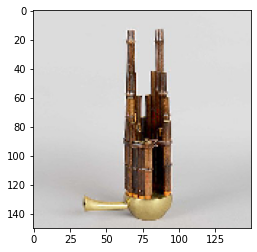

1/1 [==============================] - 0s 15ms/step
Khèn 


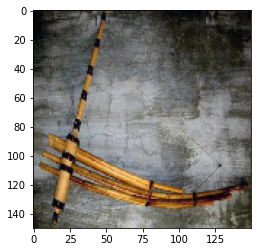

1/1 [==============================] - 0s 15ms/step
Sáo Trúc


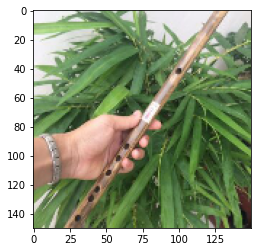

In [34]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/nhac cu/Test"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Cồng Chiêng '
  if round(result[0][1])==1:
    prediction=' Đàn Đoản '
  if round(result[0][2])==1:
    prediction='Đàn Nhị ( Đàn cò )'
  if round(result[0][3])==1:
    prediction='Đàn tì bà '
  if round(result[0][4])==1:
    prediction='Đàn Tranh '
  if round(result[0][5])==1:
    prediction='Khèn '
  if round(result[0][6])==1:
    prediction='Sáo Trúc'
  if round(result[0][7])==1:
    prediction='Đàn đá'
  
  print(prediction)
  plt.show()